In [20]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np 

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from experiment_helpers import * 
from src.solvers import *
from src.syntetic import *




In [64]:

def plot_accuracy_results(results):
    plt.figure(figsize=(6, 8))
    plt.title('Accuracy comparison of standard and hyper graphs')
    plt.ylabel('Error')
    plt.xlabel('Test Size')
  
    independent = [experiment['test_size'] for experiment in results]
    graph_accuracy = [experiment['graph_accuracy'] for experiment in results]
    hyper_graph_accuracy = [experiment['hyper_graph_accuracy'] for experiment in results]
    point_accuracy = [experiment['point_accuracy'] for experiment in results]

    plt.plot(independent, graph_accuracy, label='standard_graph_accuracy')
    plt.plot(independent, hyper_graph_accuracy, label='hyper-graph_accuracy')
    # plt.plot(independent, point_accuracy, label='point_accuracy')

    plt.legend()
    plt.show()


def run_experiments(N,M,K1,K2, repetitions):

    all_results = []

    pi_values, data = generate_model_instance(N, M, K1, K2)

    for test_size in np.arange(0, 1.1, 0.1):
        point_accuracy = 0
        hyper_graph_accuracy = 0
        graph_accuracy = 0 

        for r in range(repetitions):
           

            # take a percentile of total interactions
            training_subsize = int(len(data) * test_size)
            interactions = random.sample(data, k=training_subsize)

            # Create hypergraph
            bond_matrix = create_hypergraph_from_data(interactions)

            # Standard graph
            bin_data = binarize_data(interactions)
            bin_bond_matrix = create_hypergraph_from_data(bin_data)
            
            # predict ranks based on subset of games
            point_prediction = point_wise_ranking(pi_values,interactions)
            predicted_hyper_graph_scores , _ = synch_solve_equations(bond_matrix, 500, pi_values, 'newman', sens=1e-6)
            predicted_graph_scores, _ = synch_solve_equations(bin_bond_matrix, 500, pi_values, 'newman', sens=1e-6)

             
            print(predicted_hyper_graph_scores.keys())   


            # Measure accuracy for hypergraph and standard graph
            point_accuracy += rms(list(point_prediction.values()), list(pi_values.values()))
            hyper_graph_accuracy += rms(list(predicted_hyper_graph_scores.values()), list(pi_values.values()))
            graph_accuracy += rms(list(predicted_graph_scores.values()), list(pi_values.values()))





            
        all_results.append({
            'test_size': test_size,
            'point_accuracy': point_accuracy/repetitions,
            'graph_accuracy': graph_accuracy/repetitions,
            'hyper_graph_accuracy': hyper_graph_accuracy/repetitions
        })

    plot_accuracy_results(all_results)
   

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

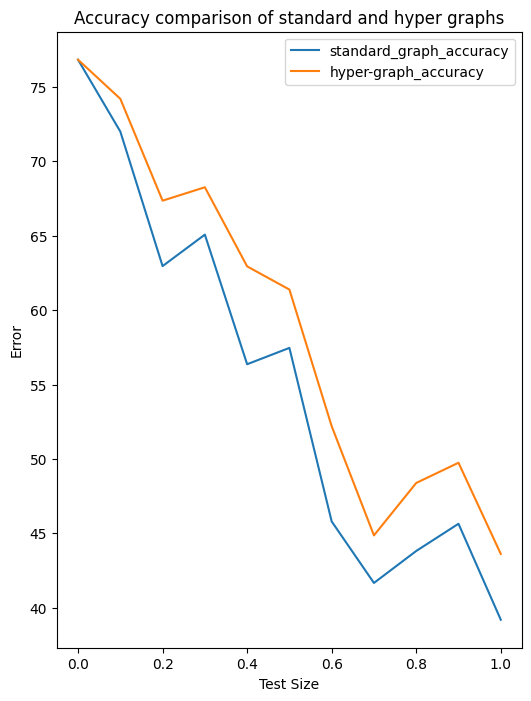

In [66]:
run_experiments(250,750,5,10, repetitions = 1)